In [15]:
from Bio.Seq import Seq 
from Bio.SeqRecord import SeqRecord
from Bio import Phylo  , AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from tabulate import tabulate

In [16]:
# Making Model
victim = Seq('ATCGTAGCTAGTCGA')
Family = [
    Seq('ATCGTGGCTAGTCGA'),
    Seq('ATCGTACGTAGTCGA'),
    Seq('ATCGTAGATAGTCGA'),
    Seq('ATCGTACGCAGTCGA'),
    Seq('ATCGTAGCTCGTCGA'),
]
sequences = [
    SeqRecord(Seq('ATCGTGGCTAGTCGA'),id = 'Family 1'),
    SeqRecord(Seq('ATCGTACGTAGTCGA'),id = 'Family 2'),
    SeqRecord(Seq('ATCGTAGATAGTCGA'),id = 'Family 3'),
    SeqRecord(Seq('ATCGTACGCAGTCGA'),id = 'Family 4'),
    SeqRecord(Seq('ATCGTAGCTCGTCGA'),id = 'Family 5'),
    SeqRecord(Seq('ATCGTAGCTCGTCGA'),id = 'Victim')  
]

In [17]:
# Distance Calculator
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [18]:
# find the nearest family member
hamming_distances = [hamming_distance(victim, member) for member in Family]
min_distance = min(hamming_distances)
nearest_fam = [index + 1 for index, distance in enumerate(hamming_distances) if distance == min_distance]
nearest_fam_victims = [Family[i-1] for i in nearest_fam]

In [19]:
# print the result
print(hamming_distances)

[1, 2, 1, 3, 1]


In [20]:
# print the nearest family member
print('The nearest family members are:')
for i, member in enumerate(nearest_fam_victims):
    print(f'Family member {nearest_fam[i]}: {member} with a hamming distance of {min_distance} from the victim sequence')

The nearest family members are:
Family member 1: ATCGTGGCTAGTCGA with a hamming distance of 1 from the victim sequence
Family member 3: ATCGTAGATAGTCGA with a hamming distance of 1 from the victim sequence
Family member 5: ATCGTAGCTCGTCGA with a hamming distance of 1 from the victim sequence


In [21]:
# Multiple Sequence Alignment
align = MultipleSeqAlignment(sequences)

In [22]:
# Distance Calculator
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

In [23]:
# Distance Tree Constructor
constructor = DistanceTreeConstructor(calculator)

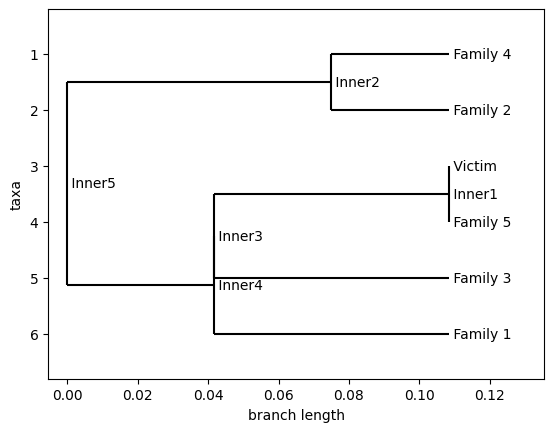

In [24]:
# UPGMA Tree
UPGMA_tree = constructor.upgma(dm)
Phylo.draw(UPGMA_tree)

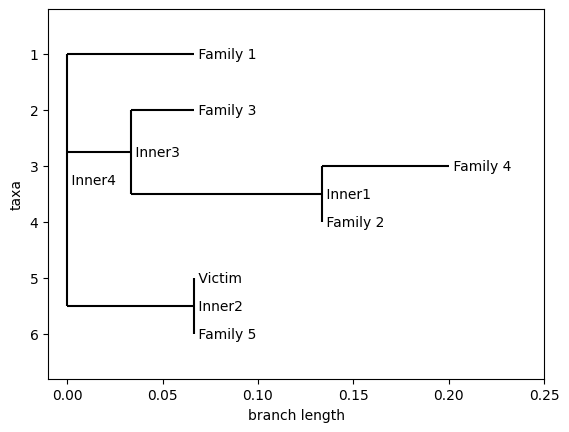

In [25]:
# Neighbor Joining Tree
Nj_tree = constructor.nj(dm)
Phylo.draw(Nj_tree)

/var/folders/yf/pwm2z7cs7m39fl6g70nggc0r0000gn/T/ipykernel_46118/3297116726.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dm_matrix, method='average')


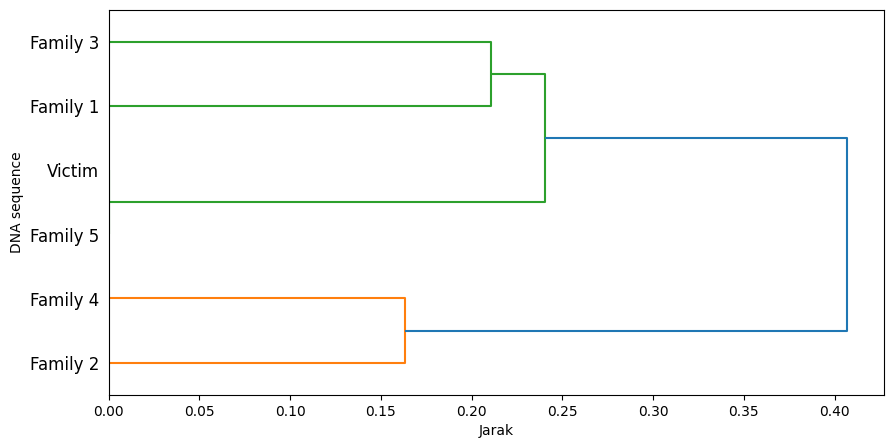

In [26]:
num_sequences = len(sequences)
hamming_matrix = np.zeros((num_sequences, num_sequences), dtype=int)
sequence_ids = [seq.id for seq in sequences]
hamming_df = pd.DataFrame(hamming_matrix, index=sequence_ids, columns=sequence_ids)

dm_matrix = np.array(dm)
linkage_matrix = linkage(dm_matrix, method='average')

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, labels=sequence_ids, orientation='right', ax=ax)

# Menyesuaikan plot
plt.xlabel('Jarak')
plt.ylabel('DNA sequence')
plt.show()